In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom,G/lambda_trts
0,0:01:01,100,500000,0.048609,0.028161,0.005518,0.001623,0.031201,0.005999,0.687342,...,0.647188,0.452468,375.114014,0.306057,0.217571,2.707181,0.000384,1.0,0.01,0.0
1,0:01:36,200,500000,0.003465,0.013278,0.006232,0.000618,0.004436,0.006137,0.475000,...,0.640257,0.509480,133.181976,0.120561,0.088121,0.912323,0.000188,1.0,0.01,0.0
2,0:02:11,300,500000,0.016054,0.007159,0.013371,0.002202,0.001626,0.007626,0.446890,...,0.526437,0.442772,70.312500,0.078512,0.063172,0.397810,0.000090,1.0,0.01,0.0
3,0:02:46,400,500000,0.434924,0.002210,0.012071,0.087686,0.027828,0.006279,0.557014,...,0.486794,0.278862,42.250751,0.062391,0.057663,0.547720,0.000074,1.0,0.01,0.0
4,0:03:21,500,500000,0.024761,0.002830,0.107389,0.000669,0.036551,0.023176,0.624157,...,0.322938,0.446210,31.720886,0.042163,0.036555,0.275454,0.000034,1.0,0.01,0.0


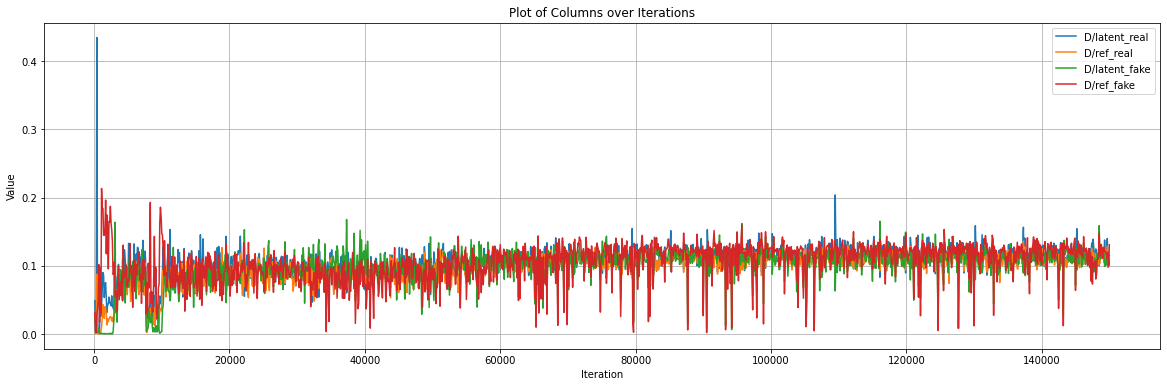

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

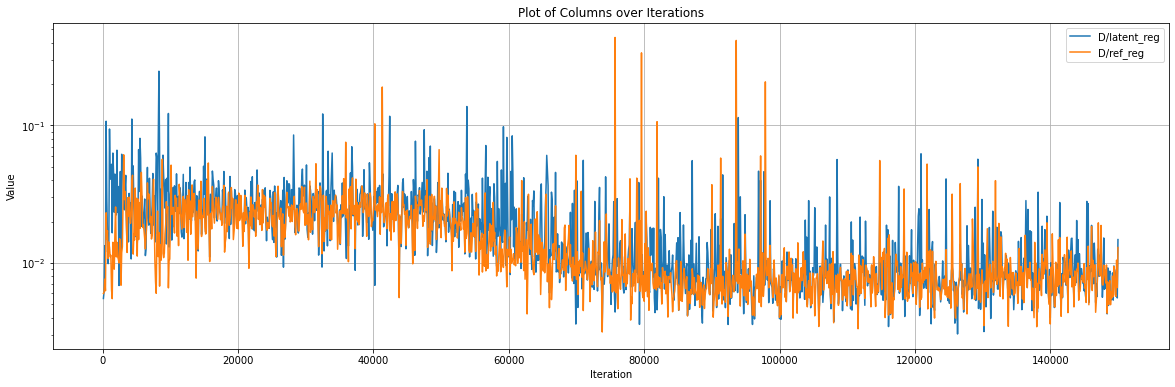

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

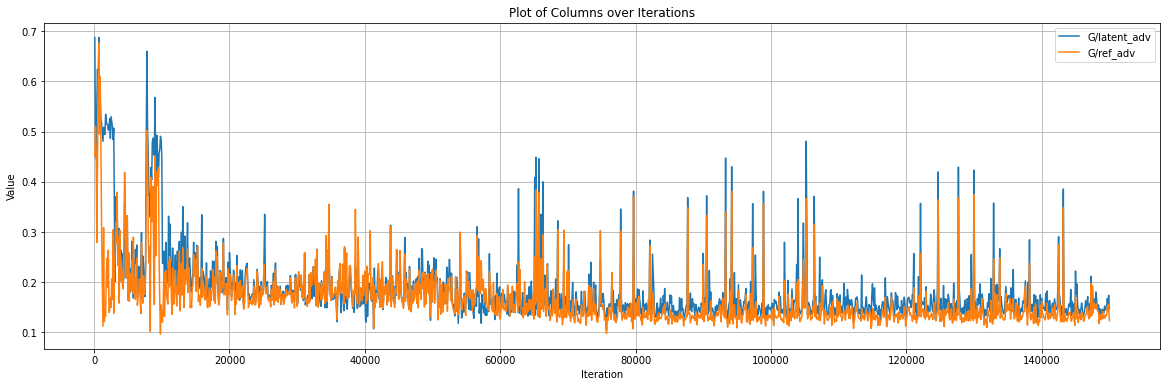

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

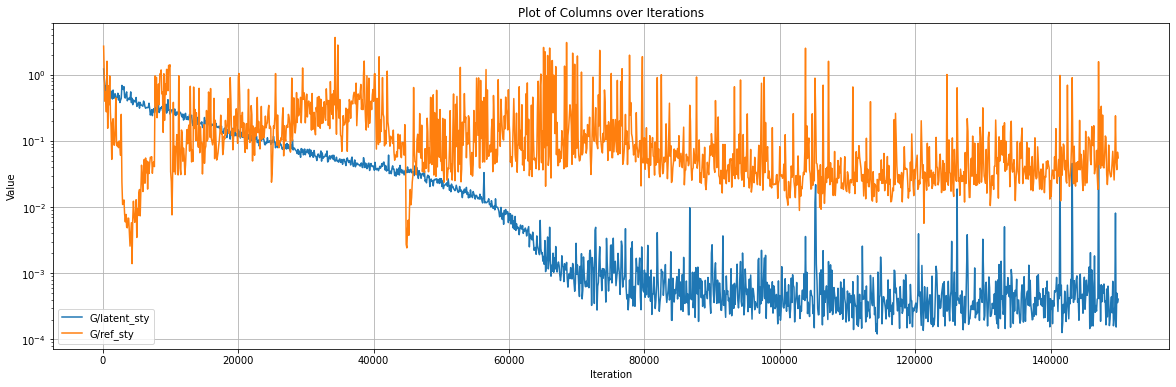

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

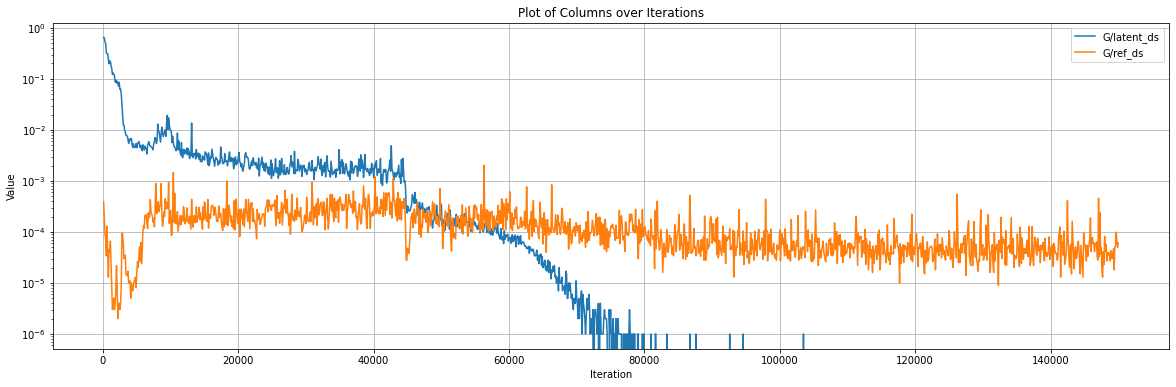

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

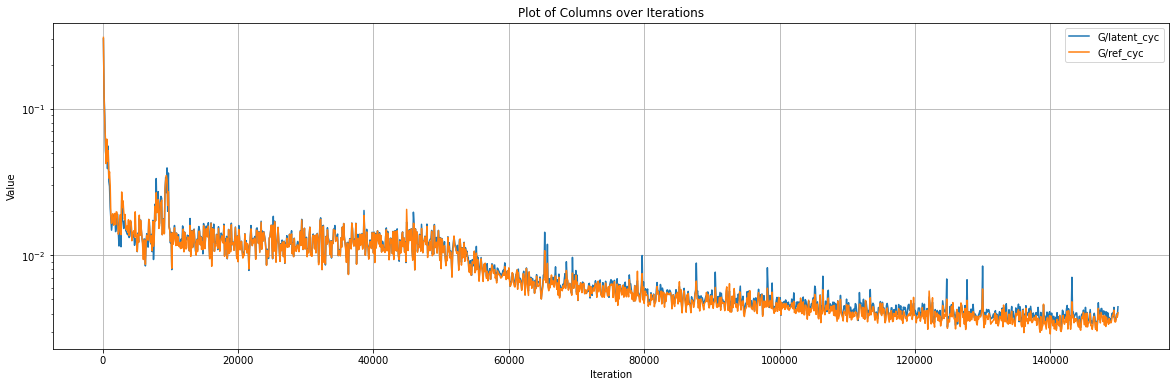

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

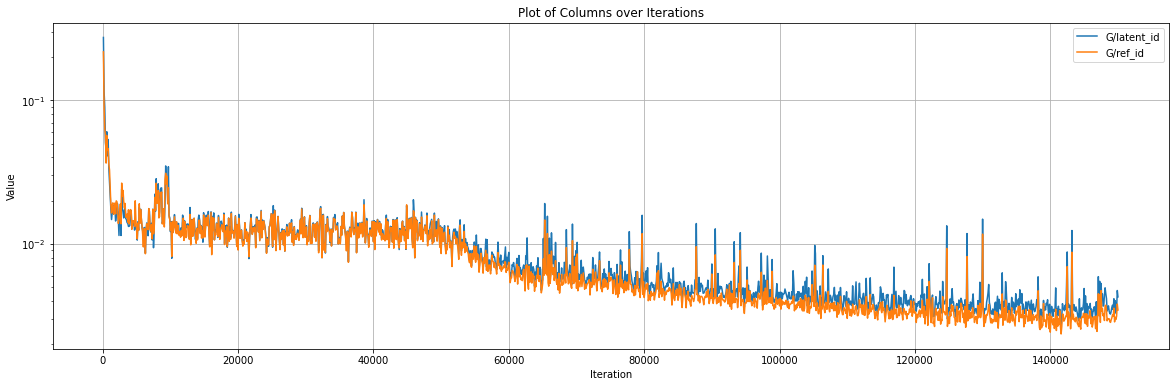

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

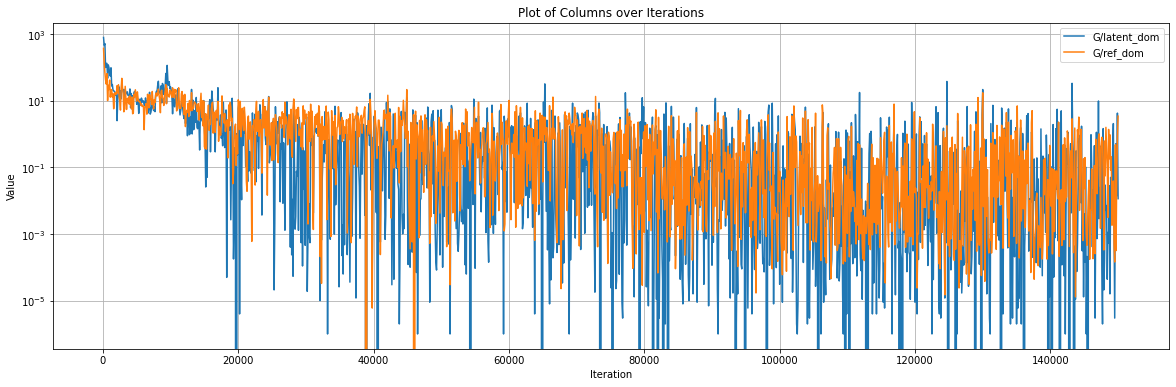

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

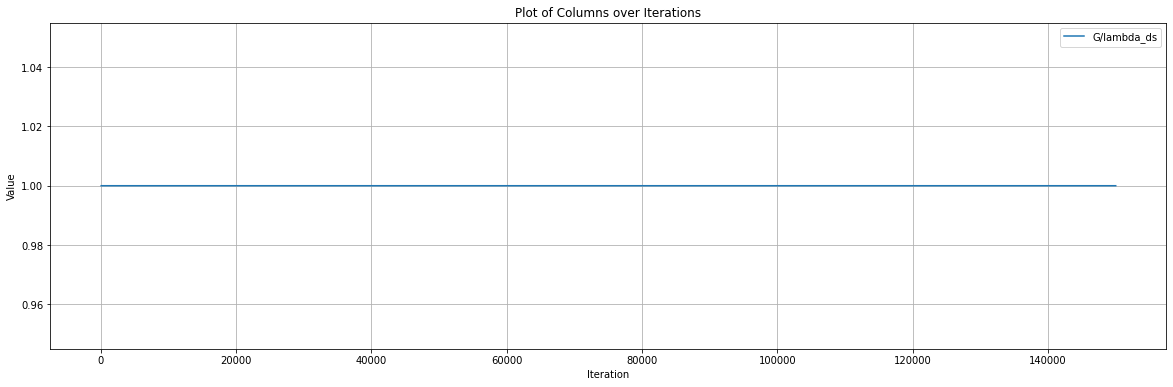

In [12]:
plot_columns(history, ['G/lambda_ds'])

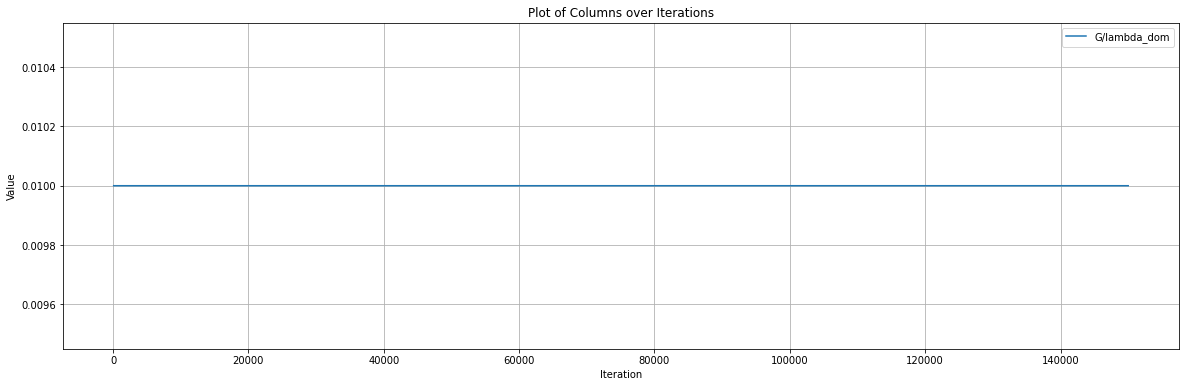

In [13]:
plot_columns(history, ['G/lambda_dom'])

# Metrics

## TSTR Score

In [14]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,domain,accuracy,loss
0,10000,latent,IR,4,0.250000,5.495882
1,10000,latent,IR,5,0.249867,2.301036
2,10000,latent,IR,6,0.496825,2.794743
3,10000,latent,IR,7,0.250398,5.011882
4,10000,latent,Ball,4,0.250398,10.347326


Maximum accuracy for Ball in latent mode: 0.3207 at step 30000
Maximum accuracy for IR in latent mode: 0.4432 at step 50000
Maximum accuracy for OR_centred in latent mode: 0.5706 at step 50000
Maximum accuracy for OR_opposite in latent mode: 0.4501 at step 60000
Maximum accuracy for OR_orthogonal in latent mode: 0.4951 at step 50000


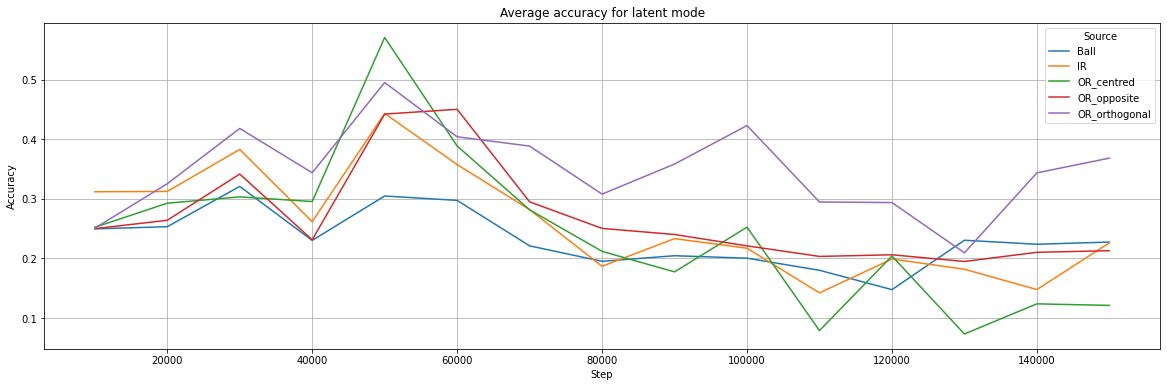

Maximum accuracy for Ball in reference mode: 0.4007 at step 140000
Maximum accuracy for IR in reference mode: 0.4071 at step 60000
Maximum accuracy for OR_centred in reference mode: 0.3595 at step 30000
Maximum accuracy for OR_opposite in reference mode: 0.4803 at step 110000
Maximum accuracy for OR_orthogonal in reference mode: 0.4118 at step 70000


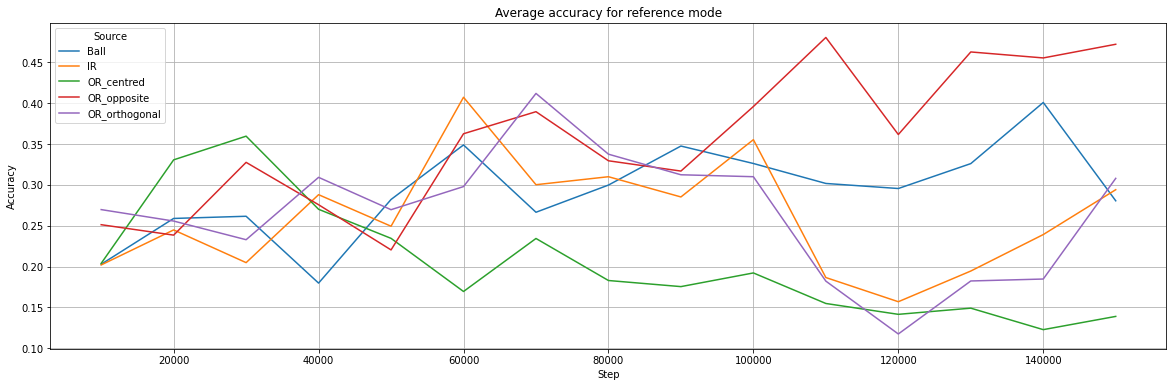

Minimum loss for Ball in latent mode: 1.7043 at step 60000
Minimum loss for IR in latent mode: 1.5120 at step 60000
Minimum loss for OR_centred in latent mode: 1.3983 at step 60000
Minimum loss for OR_opposite in latent mode: 1.3758 at step 60000
Minimum loss for OR_orthogonal in latent mode: 1.3117 at step 70000


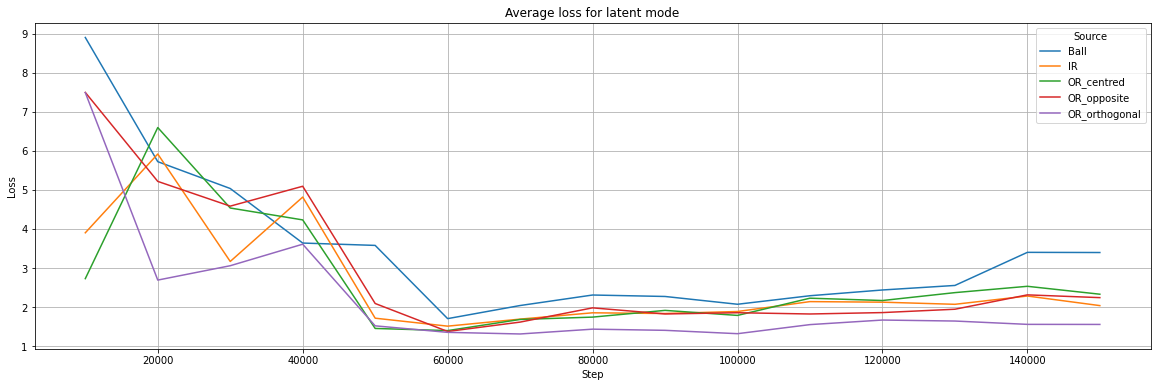

Minimum loss for Ball in reference mode: 3.6735 at step 40000
Minimum loss for IR in reference mode: 3.6217 at step 100000
Minimum loss for OR_centred in reference mode: 3.9052 at step 50000
Minimum loss for OR_opposite in reference mode: 3.6758 at step 40000
Minimum loss for OR_orthogonal in reference mode: 2.6659 at step 40000


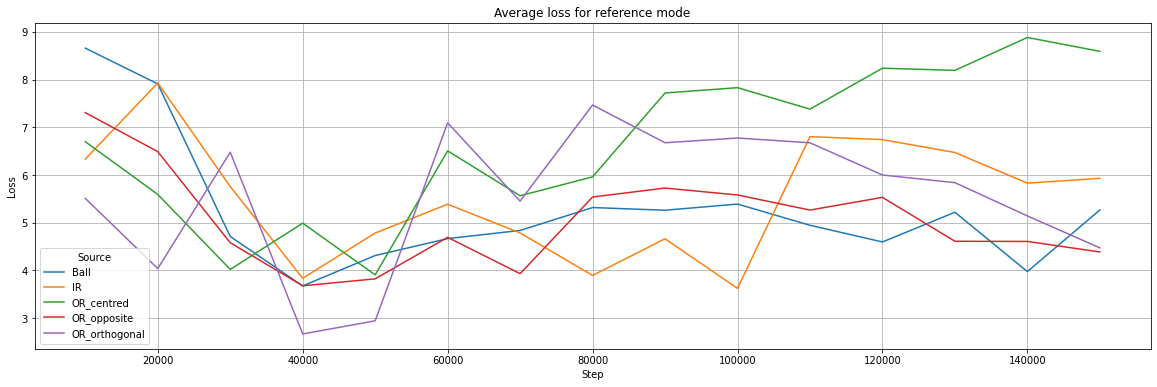

In [15]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for Ball: 0.3230 at step 60000
Maximum accuracy for IR: 0.3822 at step 60000
Maximum accuracy for OR_centred: 0.4026 at step 50000
Maximum accuracy for OR_opposite: 0.4063 at step 60000
Maximum accuracy for OR_orthogonal: 0.4001 at step 70000


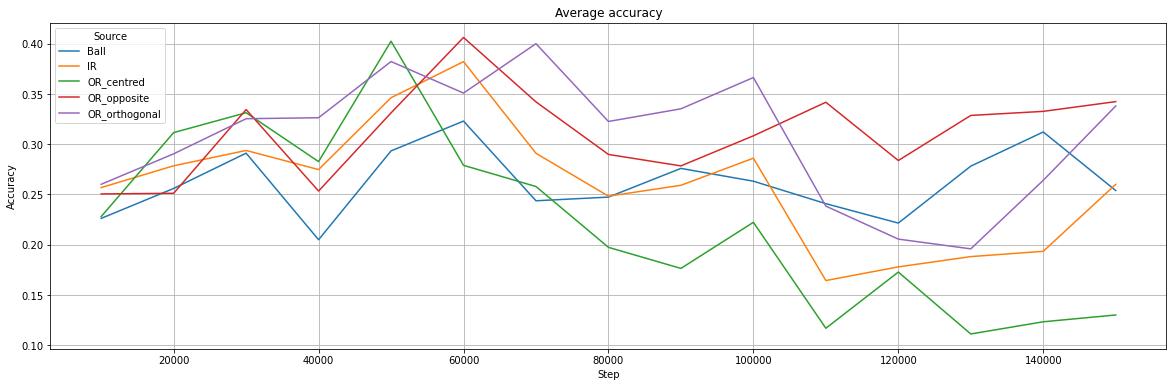

Minimum loss for Ball: 3.1847 at step 60000
Minimum loss for IR: 2.7541 at step 100000
Minimum loss for OR_centred: 2.6791 at step 50000
Minimum loss for OR_opposite: 2.7730 at step 70000
Minimum loss for OR_orthogonal: 2.2308 at step 50000


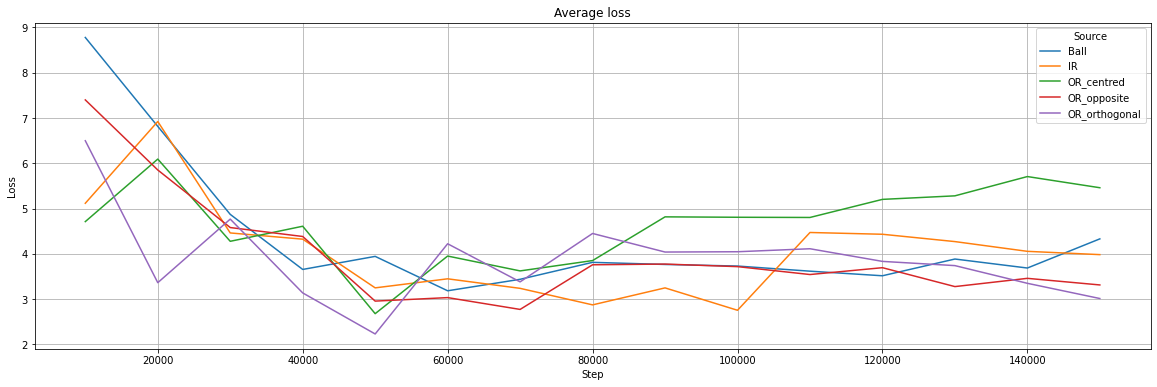

In [16]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.4511 at step 50000
Max in reference mode: 0.3204 at step 70000


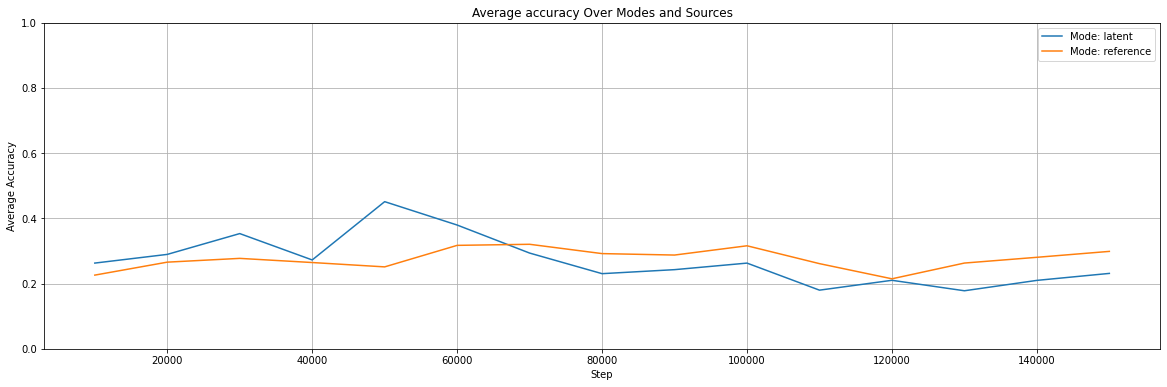

Min in latent mode: 1.4687 at step 60000
Min in reference mode: 3.7677 at step 40000


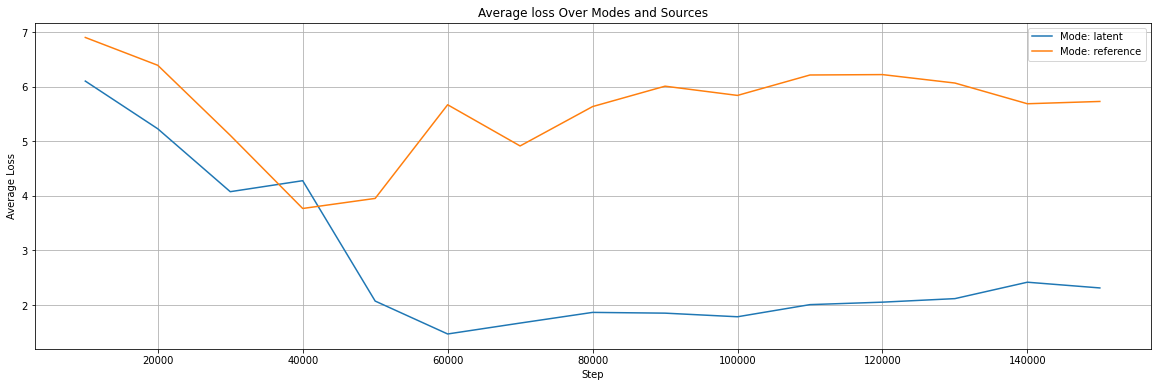

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        # # Find the maximum or minimum value of the metric before step 322000
        # max_before_322000 = mode_data[mode_data['step'] < 322000][metric].max()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
            # step_before_322000 = mode_data[mode_data[metric] == max_before_322000]['step'].values[0]
            # print(f'Max in {mode} mode before finetune: {max_before_322000:.4f} at step {step_before_322000}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

Max: 0.3511 at step 50000


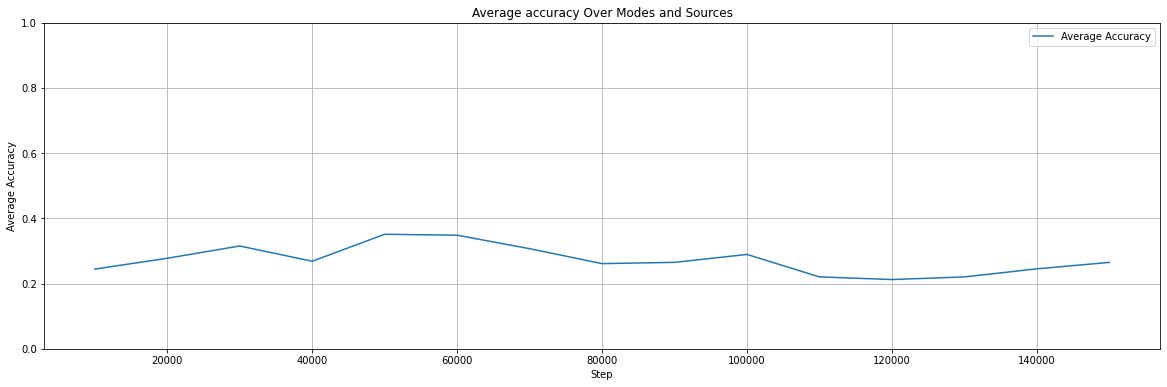

Min: 3.0119 at step 50000


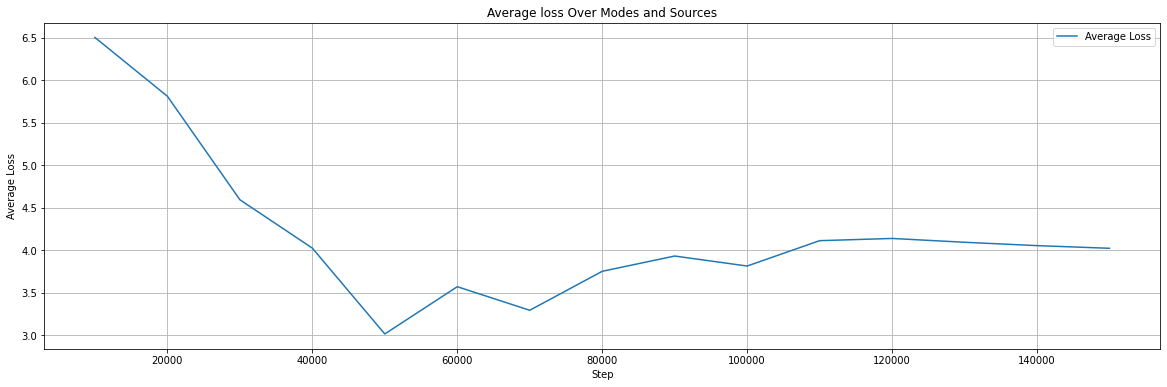

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label=f'Average {metric.capitalize()}')
    max_value = mean_data[metric].max()
    min_value = mean_data[metric].min()
    if metric == 'accuracy':
        step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Max: {max_value:.4f} at step {step}')
    else:
        step = mean_data[mean_data[metric] == min_value]['step'].values[0]
        print(f'Min: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

## Domain Score

In [19]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,10000,latent,IR,Ball,0.249203,10.437757
1,10000,latent,IR,OR_centred,0.238045,8.202402
2,10000,latent,IR,OR_orthogonal,0.265143,9.168226
3,10000,latent,IR,OR_opposite,0.234857,7.787684
4,10000,latent,Ball,IR,0.243501,7.815152


Maximum accuracy in latent mode: 0.4840 at step 140000


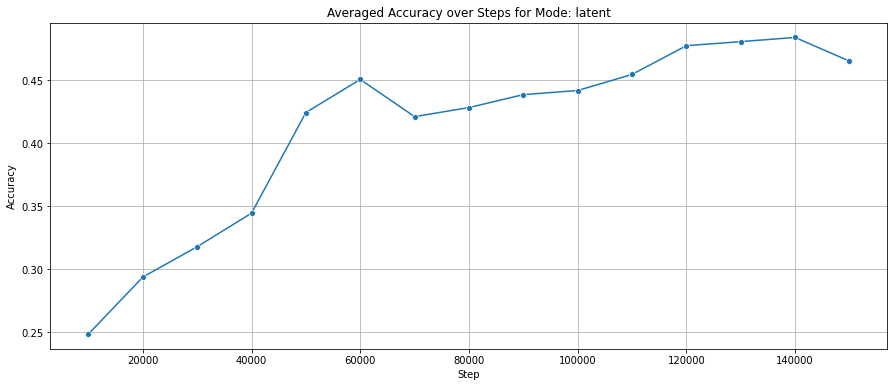

Maximum accuracy in reference mode: 0.4831 at step 140000


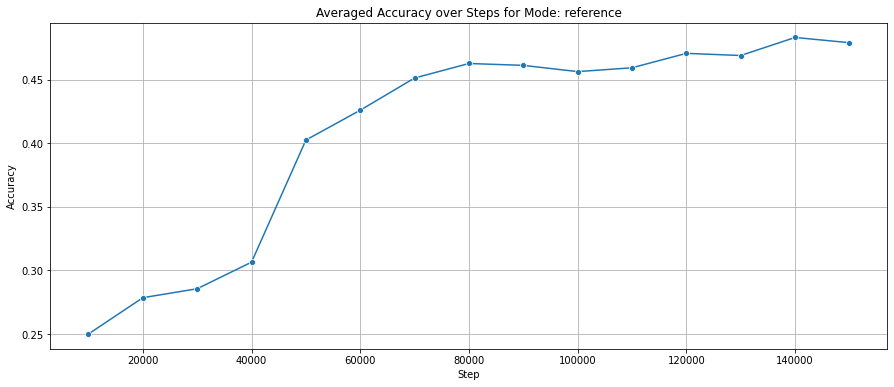

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')

Maximum accuracy in reference mode: 0.4835 at step 140000


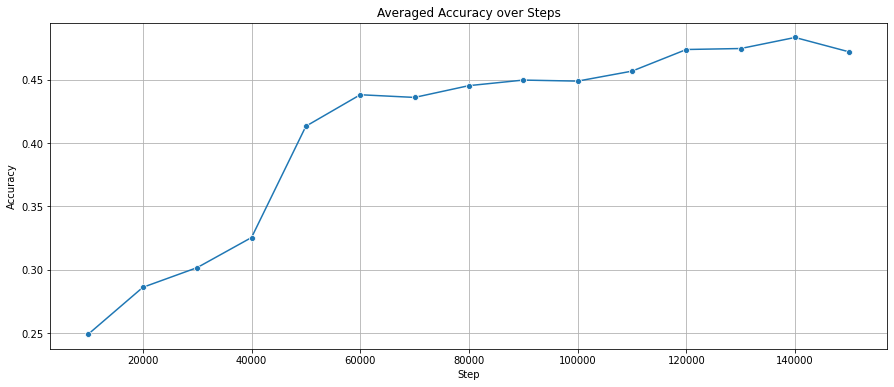

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, metric):
    
    # Group by step and calculate the mean of the metric
    averaged_data = data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



plot_metric_averaged(domain_scores, 'accuracy')

## Distance Score

In [22]:
distance_scores = pd.read_csv('eval/dist_scores.csv')
distance_scores.head()

,step,mode,source,target,domain,distance
0,10000,latent,IR,Ball,0,0.342408
1,10000,latent,IR,Ball,1,1.353662
2,10000,latent,IR,Ball,2,2.446592
3,10000,latent,IR,Ball,3,3.617090
4,10000,latent,IR,OR_centred,0,0.515349


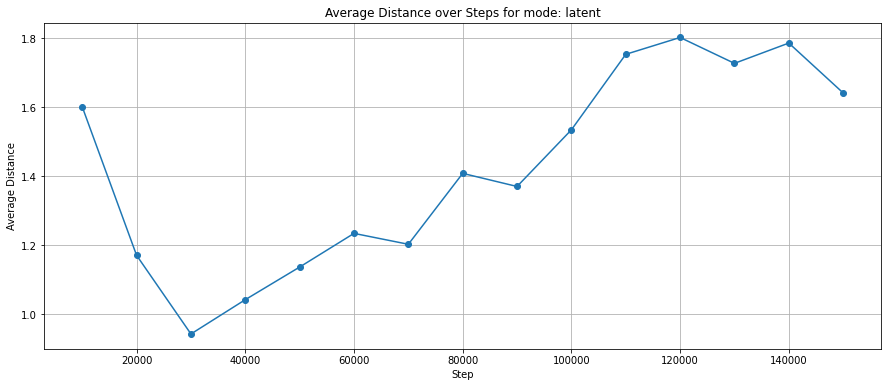

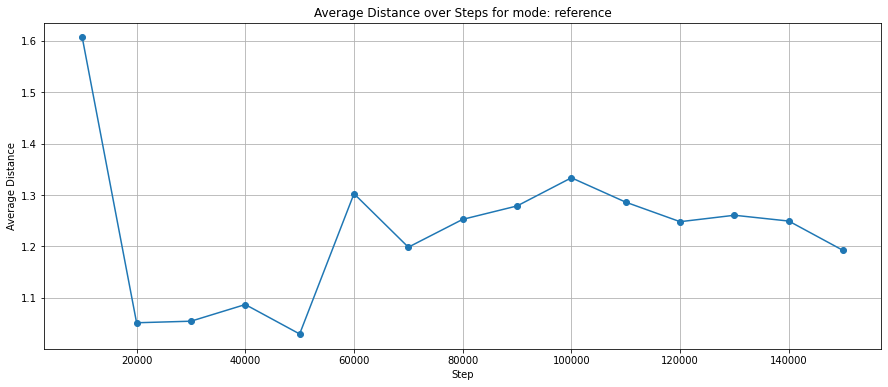

In [23]:
def plot_dist(data, mode):
    # Filter the dataframe by the given mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = filtered_data.groupby('step')['distance'].mean().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps for mode: {mode}')
    plt.grid(True)
    plt.show()

for mode in distance_scores['mode'].unique():
    plot_dist(distance_scores, mode)

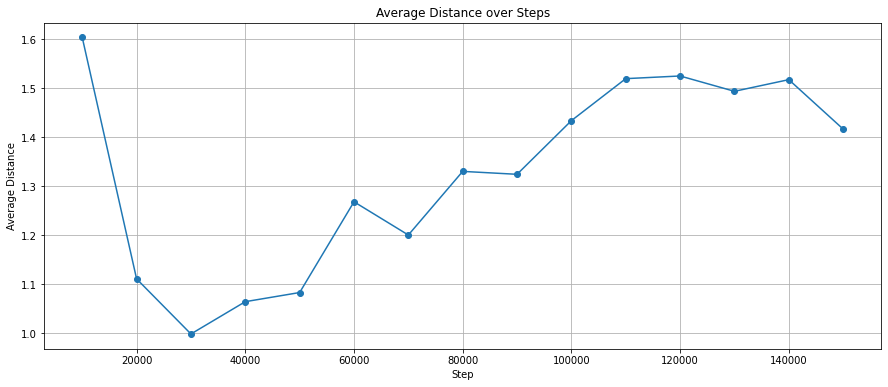

In [24]:
def plot_dist(data):
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = data.groupby('step')['distance'].mean().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps')
    plt.grid(True)
    plt.show()

plot_dist(distance_scores)